# Bulding an Image classifier with the sequential API (Keras)

In [29]:
# tensorflow "exclusive" keras library
import tensorflow as tf
from tensorflow import keras
# data visualisation
import pandas as pd
import matplotlib.pyplot as plt

import os
import random

In [2]:
tf.__version__

'2.9.2'

In [21]:
# suppressing INFO messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Loading and parsing the fashion MNIST dataset from the library

In [2]:
f_mnist = keras.datasets.fashion_mnist

In [3]:
# parsing and splitting the training and test sets 
(X_train_full, y_train_full), (X_test, y_test) = f_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
# creating a validation set by splitting up the training set
# since we will use gradient descent to train the nn, we scale the pixel intensity down by dividing by 255.
n_images = 5000
pixel_intensity_scale = 255.0

# input features
X_valid, X_train = X_train_full[:n_images] / pixel_intensity_scale , X_train_full[n_images:] / pixel_intensity_scale
# output features
y_valid, y_train = y_train_full[:n_images], y_train_full[n_images:]

# In fashion MNIST, we need a list of classes to identify the label values as indices
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [10]:
# picking some random samples from the dataset
class_names[y_train[random.randrange(y_train.shape[0])]]

'Dress'

## Building the neural network, a classification MLP

In [11]:
# function which sets up a simple Sequential model
def build_nn(n_hidden_layers: int, n_neurons_per_layer: list[int], activation="relu"):

    # initializing the model
    model = keras.models.Sequential()
    # preprocessing data by reshaping the input instances
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    # adding n hidden layers to the nn with ReLu activation
    for i in range(n_hidden_layers):
        model.add(keras.layers.Dense(n_neurons_per_layer[i], activation=activation))
    
    # adding activation output layer at the end
    model.add(keras.layers.Dense(10, activation="softmax"))   
    
    return model

In [37]:
# creating a model
model = build_nn(4, [300, 300, 200, 100])
# getting some information about the single layers, their output shape and the number of params
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 dense_8 (Dense)             (None, 200)               60200     
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 407,110
Trainable params: 407,110
Non-tr

In [38]:
# printing some basic information about the layers
layers = model.layers

for layer in model.layers[1:]:
    weights, biases = layer.get_weights()

    print(f'Weight Shape of {layer.name} layer: {weights.shape}')
    print(f'Bias Shape of {layer.name} layer: {biases.shape}')
    
    

Weight Shape of dense_6 layer: (784, 300)
Bias Shape of dense_6 layer: (300,)
Weight Shape of dense_7 layer: (300, 300)
Bias Shape of dense_7 layer: (300,)
Weight Shape of dense_8 layer: (300, 200)
Bias Shape of dense_8 layer: (200,)
Weight Shape of dense_9 layer: (200, 100)
Bias Shape of dense_9 layer: (100,)
Weight Shape of dense_10 layer: (100, 10)
Bias Shape of dense_10 layer: (10,)


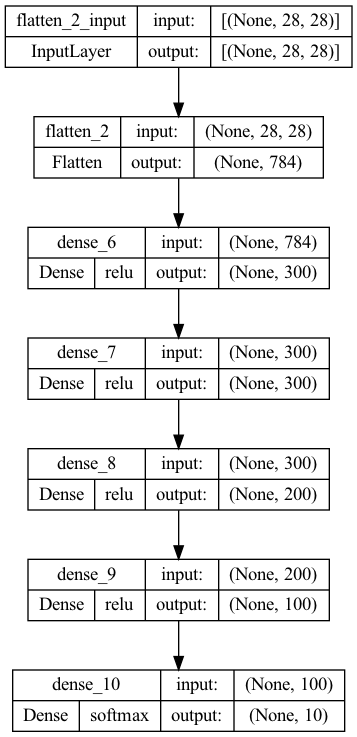

In [39]:
# plottint the model
keras.utils.plot_model(model, 
                       show_layer_activations=True, 
                       show_shapes=True
                      )

In [40]:
# Compiling the model (loss function and optimizer)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Training and evaluating the model

In [41]:
N_EPOCHS = 50

# training the model by fitting the training data
history = model.fit(X_train, y_train, epochs=N_EPOCHS,
                    validation_data=(X_valid, y_valid)) # optional



Epoch 1/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7560 - accuracy: 0.7476 - val_loss: 0.4809 - val_accuracy: 0.8328
Epoch 2/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4804 - accuracy: 0.8299 - val_loss: 0.4089 - val_accuracy: 0.8586
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4259 - accuracy: 0.8495 - val_loss: 0.3771 - val_accuracy: 0.8702
Epoch 4/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3922 - accuracy: 0.8593 - val_loss: 0.3821 - val_accuracy: 0.8606
Epoch 5/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3684 - accuracy: 0.8671 - val_loss: 0.3800 - val_accuracy: 0.8616
Epoch 6/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3500 - accuracy: 0.8737 - val_loss: 0.3551 - val_accuracy: 0.8732
Epoch 7/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3368 - accuracy: 0.8775 - val_loss: 0.3409 - val_ac

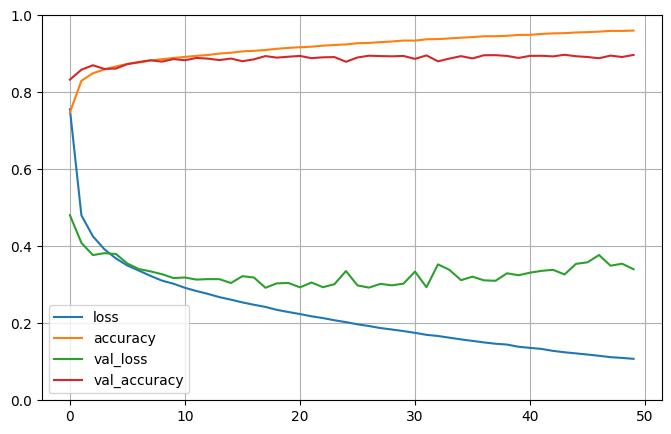

In [42]:
# plotting some parameters about the training process
pd.DataFrame(history.history).plot(figsize=[8, 5])
# adding grid
plt.grid(True)
# setting vertical range to [0, 1]
plt.gca().set_ylim(0, 1)
# showing the different learning curves
plt.show()

In [44]:
# evaluating the models perfomance on test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 81.2671 - accuracy: 0.8300


[81.26709747314453, 0.8300000429153442]

In [56]:
# making predictions and look at the result
random_sample = random.randrange(3, 10)
X_new = X_test[:random_sample]
# getting probabilities of the predictions
y_proba = model.predict(X_new)

y_proba.round(2) # observing results

1/1 [==============================] - 0s 140ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
# using predict_classes() method to look at the class with the highest estimated probability

# y_pred = model.predict_classes(X_test[:random_sample])
# Not available on TF 2.0?


# y_pred